### Illustrate the trade-off between noise and masked half-light-radii for a given cutoff

In [1]:
import os
import math as ma
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as pyfits
from os.path import expanduser
from wlenet import config

In [2]:
save_figures = True

In [3]:
cosmos_zeropoint = 25.95534132104084
p_t = 0.065
p_s = 0.03
alpha = 0.5416666666666667
I_c = 0.012

In [4]:
rgc_path = '~/datasets/wlenet/cosmos/COSMOS_25.2_training_sample/real_galaxy_catalog_25.2.fits'
rgc_dir, rgc_file = os.path.split(os.path.expanduser(rgc_path))
fits_file = os.path.splitext(rgc_file)[0] + '_fits.fits'
rgc_catalog = pyfits.getdata(os.path.join(rgc_dir, rgc_file))
fit_catalog = pyfits.getdata(os.path.join(rgc_dir, fits_file))

noise_variance_252 = rgc_catalog['NOISE_VARIANCE']
R_252 = fit_catalog['flux_radius']
F_252 = 10**((cosmos_zeropoint - fit_catalog['mag_auto']) / 2.5)

In [5]:
rgc_path = '~/datasets/wlenet/cosmos/COSMOS_23.5_training_sample/real_galaxy_catalog_23.5.fits'
rgc_dir, rgc_file = os.path.split(os.path.expanduser(rgc_path))
fits_file = os.path.splitext(rgc_file)[0] + '_fits.fits'
rgc_catalog = pyfits.getdata(os.path.join(rgc_dir, rgc_file))
fit_catalog = pyfits.getdata(os.path.join(rgc_dir, fits_file))

noise_variance_235 = rgc_catalog['NOISE_VARIANCE']
R_235 = fit_catalog['flux_radius']
F_235 = 10**((cosmos_zeropoint - fit_catalog['mag_auto']) / 2.5)

In [6]:
sigma_s = (np.mean(noise_variance_252)**0.5 + np.mean(noise_variance_235)**0.5) / 2
sigma_t = sigma_s * alpha * (p_t / p_s)

In [7]:
n_sqr_252 = (np.log(F_252 / (R_252*p_s/p_t)**2) + ma.log(ma.log(2)/ma.pi) - ma.log(I_c)) / ma.log(2)
n_sqr_235 = (np.log(F_235 / (R_235*p_s/p_t)**2) + ma.log(ma.log(2)/ma.pi) - ma.log(I_c)) / ma.log(2)

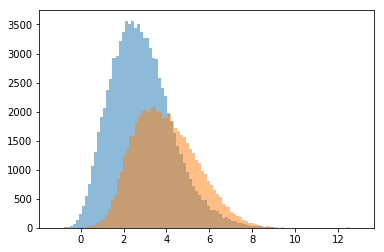

In [8]:
plt.hist(n_sqr_252, bins=100, alpha=0.5);
plt.hist(n_sqr_235, bins=100, alpha=0.5);

In [9]:
sigma_s, sigma_t, I_c / sigma_t

(0.0029188872246838325, 0.003425638478969221, 3.5029966161551336)

In [10]:
np.sum(n_sqr_252>1)/len(n_sqr_252), np.sum(n_sqr_252>0)/len(n_sqr_252)

(0.9171279528007472, 0.9956604934053167)

In [11]:
np.sum(n_sqr_235>1)/len(n_sqr_235), np.sum(n_sqr_235>0)/len(n_sqr_235)

(0.9934180014983411, 0.9997859512682388)

In [12]:
beta = (3.5*p_t/p_s)*sigma_s
ln_alpha_252 = np.log(F_252 / (R_252*p_s/p_t)**2) + ma.log(ma.log(2)/ma.pi) - ma.log(2) - ma.log(beta)
ln_alpha_235 = np.log(F_235 / (R_235*p_s/p_t)**2) + ma.log(ma.log(2)/ma.pi) - ma.log(2) - ma.log(beta)

In [13]:
ln_alpha_counts_252, ln_alpha_edges = np.histogram(ln_alpha_252, bins=100);
ln_alpha_counts_235, ln_alpha_edges = np.histogram(ln_alpha_235, bins=ln_alpha_edges);
ln_alpha_cumcounts_252 = np.cumsum(ln_alpha_counts_252)
ln_alpha_cumcounts_235 = np.cumsum(ln_alpha_counts_235)

In [14]:
log10_alpha_edges = ln_alpha_edges/ma.log(10)

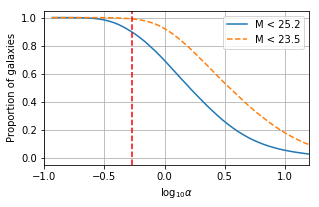

In [15]:
plt.figure(figsize=(4.75,3.15))
plt.plot(log10_alpha_edges[0:-1], 1 - ln_alpha_cumcounts_252 / ln_alpha_cumcounts_252[-1], label='M < 25.2')
plt.plot(log10_alpha_edges[0:-1], 1 - ln_alpha_cumcounts_235 / ln_alpha_cumcounts_235[-1], '--', label='M < 23.5')
plt.axvline(x=ma.log10(alpha), linestyle='--', color='r')
plt.xlim([-1,1.2])
plt.ylabel('Proportion of galaxies')
plt.xlabel(r'$\log_{10}\alpha$')
plt.grid('on')
plt.grid('on', which='minor', axis='x')
plt.legend(loc='upper right')
plt.gcf().subplots_adjust(bottom=0.2)

if save_figures:
    fig_path = expanduser(config['figure_path'] + '/calibration/cosmos_signal_noise_tradeoff.pdf')
    plt.savefig(fig_path)